Lab 2 Question 6

github repository: https://github.com/spsoofbaf/UNB_ComputerVision

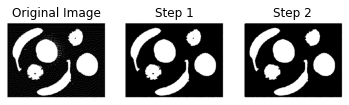

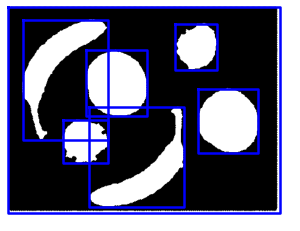

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import img_as_ubyte
from skimage.measure import label, regionprops, regionprops_table
from PIL import Image
import math
from skimage.morphology import (opening, closing)
from skimage.morphology import disk

image = img_as_ubyte(Image.open("fruit.PNG").convert("1"))
opened = opening(image)
closed = closing(opened, img_as_ubyte(disk(3)))

label_img = label(closed)
regions = regionprops(label_img)

# Plotting the result
fig, ax = plt.subplots(nrows=1, ncols=3)

ax[0].imshow(image, cmap="gray")
ax[0].axis('off')
ax[0].title.set_text('Original Image')

ax[1].imshow(opened, cmap="gray")
ax[1].axis('off')
ax[1].title.set_text('Step 1')

ax[2].imshow(closed, cmap="gray")
ax[2].axis('off')
ax[2].title.set_text('Step 2')

fig2, ax2 = plt.subplots(nrows=1, ncols=1)
ax2.imshow(closed, cmap="gray")
ax2.axis('off')
for props in regions:
    y0, x0 = props.centroid
    orientation = props.orientation
    x1 = x0 + math.cos(orientation) * 0.5 * props.axis_minor_length
    y1 = y0 - math.sin(orientation) * 0.5 * props.axis_minor_length
    x2 = x0 - math.sin(orientation) * 0.5 * props.axis_major_length
    y2 = y0 - math.cos(orientation) * 0.5 * props.axis_major_length

    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax2.plot(bx, by, '-b', linewidth=2.5)

plt.show()
